In [1]:
import pandas as pd
import numpy as np
import collections

from sklearn.feature_extraction.text import TfidfVectorizer
from clustering_helpers import (article_clustering,
                                top_topic_words, 
                                gen_nmf_tfidf_model,
                                get_top_words)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in Data
df = pd.read_csv('../data/articles_categs_nap_filled.csv', index_col=0)

In [3]:
df.head()

,years,text_final,year,categ
0,1981 - 1984,Senate Republican leader tell White House offi...,1981,politics
1,1981 - 1984,House Senate conferee today kill Senate - appr...,1981,politics
2,1981 - 1984,"Senator Bob Dole , chairman tax - write Senate...",1983,politics
3,1981 - 1984,1981 tax act draw fire provision allow company...,1982,politics
4,1981 - 1984,Reagan Administration today forward 20-year_PO...,1982,politics


In [4]:
df = df[(df['categ']=='politics')|(df['categ']=='foreign affairs')]

### Article Clustering
First we cluster all of the articles into different topics. Then we take the top words for each topic and treat each of those as separate documents, these documents are then clustered to find similar topics over time, to make the hand labeling of categories a quick process.

In [5]:
#initialize variables to be used to store analysis
intervals = [(int(i[:4]),int(i[-4:])) for i in df['years'].unique()]
interval_outputs, final_article_df = article_clustering(df, intervals, 5)
final_article_df.head()

(1981, 1984)
(1985, 1988)
(1989, 1992)
(1993, 1996)
(2009, 2012)
(2013, 2016)
(1997, 2000)
(2001, 2004)
(2005, 2008)


,text_final,categ,years
0,Senate Republican leader tell White House offi...,1,1981 - 1984
1,House Senate conferee today kill Senate - appr...,1,1981 - 1984
2,"Senator Bob Dole , chairman tax - write Senate...",1,1981 - 1984
3,1981 tax act draw fire provision allow company...,1,1981 - 1984
4,Reagan Administration today forward 20-year_PO...,1,1981 - 1984


In [6]:
final_topic_df = top_topic_words(interval_outputs, intervals)

In [7]:
pd.options.display.max_colwidth = 300
final_topic_df[['cluster','years','words_only']]

,cluster,years,words_only
0,0,1981 - 1984,soviet_pos_adj missile reagan united states soviet american_pos_adj official union administration arm nuclear_pos_adj moscow haig military_pos_adj president europe weapon talk salvador shultz nicaragua policy el russians force poland country negotiation meeting
1,1,1981 - 1984,tax budget billion cut reagan house deficit spending bill percent year program senate president increase rate congress taxis income administration committee democrats fiscal_pos_adj white senator proposal revenue economic_pos_adj vote federal
2,2,1981 - 1984,israeli_pos_adj israel lebanon beirut lebanese_pos_adj palestinian_pos_adj syrian_pos_adj israelis syria force army gemayel withdrawal troop arab_pos_adj marine fire palestinians habib minister official arafat syrians guerrilla begin west united east attack american_pos_adj
3,3,1981 - 1984,a1 company year government city new party state 000 people charge report million police county york man law member court office general case agency work board mayor old_pos_adj day accord
4,4,1981 - 1984,mondale hart campaign candidate jackson democratic_pos_adj party reagan vote delegate voter poll primary democrats election convention ferraro senator president republican_pos_adj win percent nomination new race mrs state republicans political_pos_adj vice
5,0,1985 - 1988,official united states government american_pos_adj iran israel israeli_pos_adj report military_pos_adj country today minister president army department a1 company force general attack war plane rebel administration people group intelligence accord security
6,1,1985 - 1988,tax income taxis percent rate deduction state taxpayer revenue pay company budget increase business plan million 000 cut proposal investment billion bill law governor individual interest new_pos_adj new benefit sale
7,2,1985 - 1988,soviet_pos_adj gorbachev soviet missile moscow treaty union arm reagan nuclear_pos_adj meeting united american_pos_adj states official shultz weapon range space summit geneva russians defense agreement talk test leader administration control strategic_pos_adj
8,3,1985 - 1988,campaign bush dukakis candidate party governor election county state democratic_pos_adj city new mayor voter vote cuomo jackson democrats republican_pos_adj win koch district poll senator political_pos_adj run york percent race primary
9,4,1985 - 1988,house bill senate reagan budget president billion white congress trade senator deficit vote administration committee spending cut veto program legislation democrats aid republicans republican increase measure democrat approve proposal dole


In [8]:
final_article_df = (
    final_article_df
    .join(df['year'])
    .sort_index())

In [9]:
final_article_df

,text_final,categ,years,year
0,"Senate Republican leader tell White House official today Congress reject new_POS_ADJ round budget cut propose President Reagan fiscal_POS_ADJ year . closed_POS_ADJ meeting , Senators urge Administration focus instead_POS_ADV reduction budget fiscal_POS_ADJ year 1983 1984 , accord participant mee...",1,1981 - 1984,1981
1,"House Senate conferee today kill Senate - approve proposal prohibit housing subsidy locality , New York City , rent control new_POS_ADJ vacant_POS_ADJ housing . measure attach Senate $ 37 billion package budget cut , Senate conferee , delete rent control provision , say expect House conferee con...",1,1981 - 1984,1981
2,"Senator Bob Dole , chairman tax - write Senate Finance Committee , say today Congress pass selective_POS_ADJ tax increase year , particularly_POS_ADV commercial_POS_ADJ bank thrift institution possibly_POS_ADV insurance company . Senator remark point possibility enactment omnibus_POS_ADJ tax bil...",1,1981 - 1984,1983
3,"1981 tax act draw fire provision allow company sell unused_POS_ADJ tax benefit company , practice know safe_POS_ADJ - harbor leasing . measure , major_POS_ADJ company , General Electric , million dollar income able_POS_ADJ pay little_POS_ADJ american_POS_ADJ taxis 1982 . , Occidental Petroleum ,...",1,1981 - 1984,1982
4,"Reagan Administration today forward 20-year_POS_ADJ plan modernize age air traffic control system say cost , $ 9 billion decade , meet chiefly_POS_ADV taxis ticket , fuel item . Congress approve new_POS_ADJ taxis . J. Lynn Helms , head Federal Aviation Administration , say program large_POS_ADJ ...",1,1981 - 1984,1982
5,"faced worsen state budget deficit , Connecticut General Assembly begin search week elusive_POS_ADJ accord new_POS_ADJ high_POS_ADJ state taxis attract vote enact . day meeting key_POS_ADJ legislator committee hearing tax issue , appear immediate_POS_ADJ conclusion , accord legislative_POS_ADJ le...",1,1981 - 1984,1983
6,"Agriculture Secretary John R. Block say today help cut Federal spending , Reagan Administration propose legislation sharply_POS_ADV curtail Government price support farmer . approve Congress , legislation unravel system income price support develop Depression . leave nation farmer dependent_POS_...",1,1981 - 1984,1984
7,"republican_POS_ADJ chairman Senate Finance Committee , Bob Dole , democratic_POS_ADJ chairman House Ways Means Committee , Dan Rostenkowski , say today narrow difference tax - relief bill concession come President Reagan.''we're close_POS_ADV ought discuss Administration , ' ' Senator Dole say r...",1,1981 - 1984,1981
8,"work group present President Reagan ' ' draconian_POS_ADJ ' ' plan Wednesday cut spending $ 100 billion 1988 , reduce project deficit $ 100 billion fiscal_POS_ADJ year , Administration official say today . President Reagan expect decide later_POS_ADV week far_POS_ADV want direction , Larry Speak...",1,1981 - 1984,1984
9,"people professional_POS_ADJ landlord earn income p iece residential_POS_ADJ property time year wonder handle tax liability income . rent vacation house , second_POS_ADJ home part primary_POS_ADJ residence . , force job transfer unable_POS_ADJ sell home year poor_POS_ADJ real_POS_ADJ estate marke...",1,1981 - 1984,1983


##### Topic Clustering

Here we take the clusters of topics which were generated on a yearly basis and see if we can cluster the topics.  The advantage of this approach is that we can see different subtopics emerge at different points of time.  We will then use these key words which are generated to label each topic as either `business`, `politics`, `sports`, `foreign affairs`, `medicine`, and `culture`.

In [10]:
tfidf  = TfidfVectorizer(max_df=0.80, min_df=2, max_features= 500)
topic_output = gen_nmf_tfidf_model(final_topic_df['topic_words_weighted'], n_topics = 15, tfidf_vectorizer=tfidf)
top_30words_topics = get_top_words(topic_output['nmf'], topic_output['tfidf_vectorizer'],n_top_words=30)

In [11]:
for j in top_30words_topics:
    print('------------------------------------')
    print([i[1] for i in top_30words_topics[j]])

------------------------------------
['republicans', 'house', 'senate', 'democrats', 'vote', 'senator', 'republican', 'white', 'party', 'republican_pos_adj', 'president', 'bill', 'congress', 'democratic_pos_adj', 'obama', 'election', 'committee', 'clinton', 'dole', 'democrat', 'political_pos_adj', 'campaign', 'state', 'representative', 'voter', 'candidate', 'leader', 'governor', 'tax', 'bush']
------------------------------------
['iraq', 'iraqi_pos_adj', 'american_pos_adj', 'baghdad', 'force', 'war', 'hussein', 'official', 'military_pos_adj', 'troop', 'taliban', 'al', 'afghanistan', 'attack', 'united', 'intelligence', 'soldier', 'iraqis', 'security', 'nations', 'government', 'army', 'qaeda', 'states', 'insurgent', 'commander', 'iran', 'bush', 'kill', 'general']
------------------------------------
['page', 'new', 'york', 'drug', 'kill', 'times', 'new_pos_adj', 'business', 'science', '000', 'a1', 'abortion', 'accord', 'administration', 'adviser', 'afghanistan', 'agreement', 'aide', 'ai

In [12]:
key_words = {'domestic': ['budget', 'deficit', 'house', 'billion', 'bill', 'senate', 'spending', 
                          'program', 'cut', 'increase', 'congress', 'committee', 'trade', 
                          'administration', 'proposal', 'senator','year', 'democrats', 'federal', 'democrat', 
                          'economic_pos_adj', 'percent', 'republican', '000'],
             'middle east1': ['iraq', 'iraqi_pos_adj', 'baghdad', 'hussein', 'american_pos_adj', 'force', 
                              'war', 'military_pos_adj', 'official', 'troop', 'united', 'iraqis', 
                              'attack', 'nations', 'al', 'soldier', 'iran', 'general', 'army', 
                              'intelligence', 'security', 'government', 'states', 'insurgent', 
                              'arab_pos_adj', 'oil', 'kill', 'weapon', 'ally'],
             'middle east2': ['israeli_pos_adj', 'israel', 'palestinian_pos_adj', 
                              'arafat', 'palestinians', 'israelis', 'west', 'arab_pos_adj', 
                              'minister', 'fire', 'syrian_pos_adj', 'army', 'syria', 'gaza', 
                              'peace', 'attack', 'force', 'official', 'bank', 'hamas', 'troop', 
                              'today', 'bombing', 'kill', 'united', 'american_pos_adj', 'a1'],
             'middle east3':['afghanistan', 'agreement', 'aide', 'air', 'al', 'ally', 'american_pos_adj', 
                             'arab_pos_adj', 'arafat', 'arm', 'army', 'art', 'article', 'attack', 'baghdad', 
                             'bank', 'beat'],
             'middle east4': ['taliban', 'afghanistan', 'american_pos_adj', 'qaeda', 'soldier', 'intelligence', 
                              'official', 'troop', 'commander', 'al', 'military', 'insurgent', 'military_pos_adj', 
                              'force', 'security', 'war', 'attack', 'nato', 'kill', 'states', 'fighter', 
                              'government', 'army', 'united', 'iraq', '000', 'a1', 'abortion', 'accord', 
                              'administration'],
             'middle east - iran': ['iran', 'nuclear_pos_adj', 'iranian_pos_adj', 'weapon', 'administration',
                                    'israel', 'korea', 'sanction', 'netanyahu', 'united', 'intelligence', 
                                    'official', 'states', 'north', 'uranium', 'hamas', 'deal', 'kerry', 'security', 
                                    'agency', 'president', 'gaza'],
             'crime': ['court', 'judge', 'case', 'lawyer', 'justice', 'prosecutor', 'law', 'trial', 'charge', 
                         'jury', 'investigation', 'federal_pos_adj', 'ms', 'prison', 'attorney', 'sentence', 
                         'department', 'defendant', 'legal_pos_adj', 'yesterday', 'juror', 'witness', 'decision',
                         'evidence', 'murder', 'police', 'criminal_pos_adj', 'crime', 'agency', 'man'],
             'USSR/Russia': ['soviet_pos_adj', 'missile', 'soviet', 'reagan', 'arm', 'union', 'moscow', 
                             'nuclear_pos_adj', 'states', 'united', 'shultz', 'talk', 'weapon', 'meeting', 
                             'american_pos_adj', 'russians', 'administration', 'europe', 'official', 
                             'policy', 'military_pos_adj', 'force', 'country', 'gorbachev', 'president', 
                             'agreement', '000', 'a1', 'abortion', 'accord'],
            'serbian conflict': ['nato', 'serbs', 'serbian_pos_adj', 'bosnia', 'nations', 'force', 
                                 'refugee', 'war', 'military_pos_adj', 'army', 'american_pos_adj',
                                 'united', 'official', 'attack', 'soldier',
                                 'russian_pos_adj', 'rebel'],
             'international affairs':['trade', 'states', 'united', 'american_pos_adj', 'official', 'country', 'japan', 
                      'administration', 'market', 'government', 'company', 'world', 'economic_pos_adj', 
                      'agreement', 'new_pos_adj', 'europe', 'policy', 'germany', 'bank', 'president', 
                      'israel', 'today', 'german_pos_adj', 'billion', 'bush', 'year', 'union', 'minister', 
                      'group']
            }

campaign_generics = ['campaign', 'candidate', 'voter', 'election', 'vote', 
                     'race', 'new', 'poll', 'political_pos_adj', 'convention', 
                     'win', 'percent', 'presidential_pos_adj', 'primary', 'delegate']
campaign_additions = ['Ronald Reagan Walter Mondale','George Bush Michael Dukakis',
                      'George Bush Bill Clinton','Bill Clinton Bob Dole','George Bush Al Gore',
                      'George Bush John Kerry','Barack Obama John McCain Hillary Clinton','Barack Obama Mitt Romney',
                      'Donald Trump Hillary Clinton']

In [13]:
for candidates, years in zip(campaign_additions,
                      sorted(df['years'].unique())):
    key_words['election '+years] = campaign_generics+candidates.lower().split(' ')

In [14]:
keyword_scores1 = {}
for key in key_words:
    keyword_scores1[key] = (
        final_topic_df['words_only'].str.split(' ')
        .apply(lambda x: int(100* round(len(set(x) & set(key_words[key]))
               /float(len(key_words[key])), 4))))
    
keyword_scores1 = pd.DataFrame(keyword_scores1).reset_index()

In [15]:
keyword_scores1

,index,domestic,middle east1,middle east2,middle east3,middle east4,middle east - iran,crime,USSR/Russia,serbian conflict,international affairs,election 1981 - 1984,election 1985 - 1988,election 1989 - 1992,election 1993 - 1996,election 1997 - 2000,election 2001 - 2004,election 2005 - 2008,election 2009 - 2012,election 2013 - 2016
0,0,4,24,14,11,23,31,0,80,29,34,5,0,0,0,0,0,0,0,0
1,1,83,0,0,0,3,9,0,10,0,17,15,10,15,15,10,10,9,10,10
2,2,0,27,70,29,23,13,0,13,35,17,0,0,0,0,0,0,0,0,0
3,3,8,6,3,0,13,4,23,10,0,10,5,5,5,5,5,5,4,5,5
4,4,12,0,0,0,0,4,0,6,0,3,84,73,73,73,73,73,66,73,73
5,5,4,48,40,17,50,40,3,36,52,44,0,0,0,0,0,0,0,0,0
6,6,33,0,0,0,3,0,3,3,0,10,10,10,15,15,10,10,9,10,10
7,7,4,17,11,17,16,27,0,66,17,24,5,0,0,0,0,0,0,0,0
8,8,12,0,0,0,0,0,0,0,0,3,63,73,68,63,68,68,57,63,63
9,9,79,0,0,0,3,9,0,10,0,13,10,5,10,15,5,5,4,5,5


In [16]:
max_scores1 = (
    pd.melt(keyword_scores1, id_vars='index')
    .groupby('index').max()
    .reset_index()[['index','value']]
    .set_index(['index','value']))

all_scores1 = (
    pd.melt(keyword_scores1, id_vars='index')
    .set_index(['index','value']))

topic_matches1 = (
    max_scores1
    .join(all_scores1, on = ['index','value'])
    .reset_index().set_index('index')
    .drop('value',axis=1)
    .rename(columns = {'variable':'pct_column'})
)

Use 20% as threshold for each topic.

In [17]:
final_topic_df = (
    final_topic_df
    .join(topic_matches1.loc[(max_scores1.reset_index()['value']>20)])
    .fillna('NAP'))

In [18]:
final_topic_df_copied = final_topic_df.copy()

### Deal with topics which were assigned more than once

In [19]:
cluster_counts = final_topic_df.groupby(['cluster','years']).count()
mult_clusters = list(cluster_counts[cluster_counts['pct_column']>1].index)
nap_idx = list(
    final_topic_df[final_topic_df['pct_column']=='NAP']
    .set_index(['cluster','years']).index)

idx = mult_clusters + nap_idx

In [20]:
print(idx)
cluster_counts[cluster_counts['pct_column']>1]

[(4, '2013 - 2016'), (3, '1993 - 1996'), (2, '1997 - 2000'), (0, '2005 - 2008')]


,,topic_words_weighted,words_only,pct_column
cluster,years,,,
4,2013 - 2016,2,2,2


In [21]:
## Extract df of just topics which were assigned to only one topic
one_topic_df =(
    final_topic_df
    .copy()
    .set_index(['cluster','years'])
    .loc[final_topic_df
         .set_index(['cluster','years'])
         .index
         .difference(idx)])

In [22]:
(final_topic_df
 .set_index(['cluster','years'])
 .sort_index().loc[idx[0]].head(2))

topic_words_weighted  \
cluster years                                                                                                                                                                                                                                                                                                                      
4       2013 - 2016  clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton mrs mrs mrs mrs mrs mrs mrs mrs mrs mrs ...   
        2013 - 2016  clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton clinton mrs mrs mrs mrs mrs mrs mrs mrs mrs mrs ...   

                                                                                                                                                                                                                                                       words_only  \
cluster years                                                                                                                                                                                                                                                       
4       2013 - 2016  clinton mrs sanders campaign voter email woman hillary democratic_pos_adj candidate obama state aide adviser ms bernie presidential_pos_adj 2008 win iowa husband president supporter democrats delegate primary secretary poll donor speech   
        2013 - 2016  clinton mrs sanders campaign voter email woman hillary democratic_pos_adj candidate obama state aide adviser ms bernie presidential_pos_adj 2008 win iowa husband president supporter democrats delegate primary secretary poll donor speech   

                               pct_column  
cluster years                              
4       2013 - 2016  election 2005 - 2008  
        2013 - 2016  election 2013 - 2016

In [23]:
dup_records = []
ii = 0
actual_subtopic = 'election 2013 - 2016'

record_simple = (
    final_topic_df
    .copy()
    .set_index(['cluster','years'])
    .sort_index()
    .loc[idx[ii],['topic_words_weighted','words_only']]
    .iloc[0].to_dict()
)
record_simple['cluster'] = idx[ii][0]
record_simple['years'] = idx[ii][1]
record_simple['pct_column'] = actual_subtopic
dup_records.append(record_simple)

In [24]:
nap_records = (
    final_topic_df
    .copy()
    .set_index(['cluster','years'])
    .loc[nap_idx]
)

In [25]:
nap_records.head(5)

,,topic_words_weighted,words_only,pct_column
cluster,years,,,
3,1993 - 1996,page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page p...,page new york kill trade drug new_pos_adj china plan clinton science die times article crash nuclear_pos_adj korea north analysis abortion japan pact president woman art leader city death world giuliani,NAP
2,1997 - 2000,page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page page p...,page new york city drug art kill new_pos_adj jersey plan times game win find woman charge court million year school beat article review die science museum health book cancer stock,NAP
0,2005 - 2008,company company company company company company company like like like like like like like people people people people people people work work work work work work not_pos_adv not_pos_adv not_pos_adv not_pos_adv not_pos_adv not_pos_adv time time time time time time know know know know know new ne...,company like people work not_pos_adv time know new man executive million ms world go book day come write news york life business family want think board city friend tell way,NAP


In [26]:
nap_records.loc[nap_idx[0],'pct_column'] = 'miscellaneous'
nap_records.loc[nap_idx[1],'pct_column'] = 'miscellaneous'
nap_records.loc[nap_idx[2],'pct_column'] = 'miscellaneous'

In [27]:
final_topic_df = (
    one_topic_df.reset_index()
    .append(pd.DataFrame(dup_records), sort = False)
    .append(nap_records.reset_index(), sort = False)
).reset_index(drop=True)

#consolidate topics into fewer so it is more manageable to deal with
col_finder = lambda x: [col for col in final_topic_df['pct_column'].unique() if x in col]
col_mapping = lambda x: {col:x for col in col_finder(x)}
me_mapping = col_mapping('middle east')
elect_mapping = col_mapping('election')
intl_aff_mapping = {'USSR/Russia':'international affairs',
                    'serbian conflict': 'international affairs'}

topic_mappings = {**me_mapping, **elect_mapping, **intl_aff_mapping}
final_mappings = {col:(topic_mappings[col] if col in topic_mappings else col)
                  for col in final_topic_df['pct_column'].unique()}
final_topic_df['pct_column'] = final_topic_df['pct_column'].map(final_mappings)

final_article_df = (
    final_article_df
    .rename(columns={'categ':'cluster'})
    .set_index(['cluster','years'])
    .join(final_topic_df[['cluster','years','pct_column']]
          .set_index(['cluster','years']))
    .reset_index().drop('cluster',axis=1)
)

In [28]:
total_year_counts = (final_article_df
                     .groupby('years').count()
                     .rename(columns={'pct_column':'total_count'})
                     .drop('text_final',axis=1))

total_year_props = (
    pd.merge(final_article_df
             .groupby(['years','pct_column']).count()
             .reset_index(),
             total_year_counts,
             on = 'years')
    .rename(columns = {'text_final':'article_count'})
)
total_year_props['topic_prop'] = (
    total_year_props['article_count']/total_year_props['total_count'])

total_year_props['final_year'] = total_year_props['years'].str[-5:].astype(int)

cols = {col_type:total_year_props[total_year_props['pct_column']==col_type].set_index('final_year')['article_count'] 
        for col_type in total_year_props['pct_column'].unique()}

categ_ot = pd.DataFrame(cols).fillna(0)

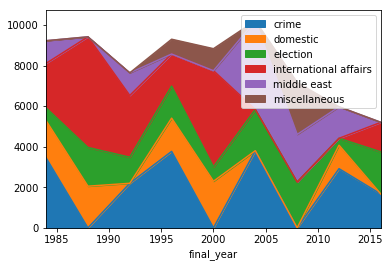

In [29]:
categ_ot.plot.area()
plt.show()

In [31]:
(final_article_df.rename(columns = {'pct_column':'subcateg'})
 .to_csv('../data/political_subcategs.csv')
)